# Data Mining Assignment 2_NN

## Student Details

Student Name and ID of the member submitting the assignment: 

Student Name and ID of the remaining members: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!

step One Load data set

In [9]:
#Libraries to be used
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [10]:
#Code to import data set
dataset = pd.read_csv('C:/Users/16824/OneDrive/Desktop/Project/Data Mining/Assignment2/PA2-1/pima-indians-diabetes.csv')

In [11]:
#Selecting x as feature dataset and y traget dataset
X= dataset.drop('class', axis= 1)
#prepprocessing Since the enitre data is numeric only scaling pre-processing can be done to standardize the data
X = pd.DataFrame(preprocessing.scale(X), columns=['Preg','Plas','Pres','skin','test','mass','pedi','age'])
y= dataset['class']
# dataset is divided into 20 percent test and 60 80 train
xtrainDataSet,xtestDataSet,ytrainDataSet,ytestDataSet =  train_test_split(X,y,test_size=0.20, random_state= 2002)
xtrainDataSet.shape, xtestDataSet.shape,ytrainDataSet.shape,ytestDataSet.shape

((614, 8), (154, 8), (614,), (154,))

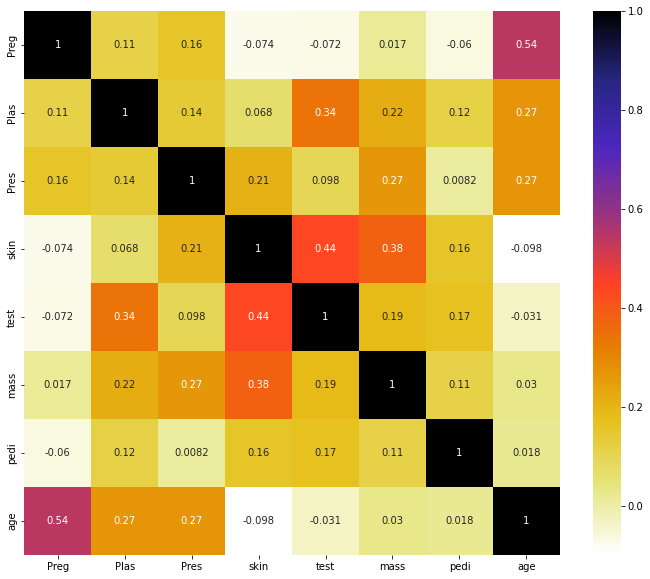

In [12]:
# Plotting correlation matrix for traindata
plt.figure(figsize=(12,10))
cor = xtrainDataSet.corr()
sns.heatmap(cor, annot= True, cmap= plt.cm.CMRmap_r)
plt.show()

In [13]:
correlation = set()
corrMatrix = xtrainDataSet.corr()
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i,j]) > 0.17:
             # Checking threshold
            col = corrMatrix.columns[i] # retreaving names
            correlation.add(col) #Name of columns  
print(len(correlation),correlation)
# They are highly correlated so have to remove from test and train data set
# high related correlation are droped that gives best 3 attributes
xtrainDataSet =  xtrainDataSet.drop(correlation,axis= 1)
xtestDataSet =  xtestDataSet.drop(correlation,axis= 1)
xtrainDataSet.shape,xtestDataSet.shape

5 {'test', 'mass', 'skin', 'age', 'pedi'}


((614, 3), (154, 3))

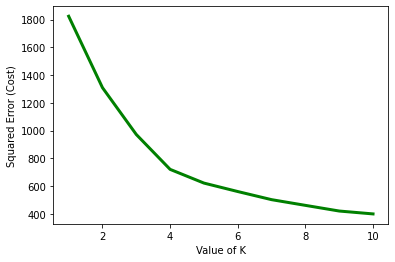

In [14]:
#Code for calculating K means
# Method 2 elbow method
# make_blobs() is used to generate sample points
# around c centers (randomly chosen)
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(xtrainDataSet)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
# the best value for k is 6 according to the graph

Code for train 60,test-20,validate-20 dataset

In [15]:
#Data set is already divided test data 20 percent and train data 80
xtrainAfterValidate,xValidate,ytrainAfterValidate,yValidate=train_test_split(xtrainDataSet,ytrainDataSet, test_size= 0.25, random_state=2002)
xtrainAfterValidate.shape,xValidate.shape,ytrainAfterValidate.shape,yValidate.shape

((460, 3), (154, 3), (460,), (154,))

In [17]:
#Determining the optimal value for k classifier cross validations cross folds as 5
kValues = [i for i in range(1,50,2)]
k_scores= []

for k in kValues:
    Knn = KNeighborsClassifier(n_neighbors= k, n_jobs=-1)
    # cross validation required to predict performance of the dataset
    scores = cross_val_score(Knn, xtrainDataSet.to_numpy(),ytrainDataSet.to_numpy(), cv=5,scoring='accuracy') 
    k_scores.append(scores.mean()) 
optimalK = kValues[k_scores.index(max(k_scores))]
print(optimalK)

31


Text(0, 0.5, 'Error Rate')

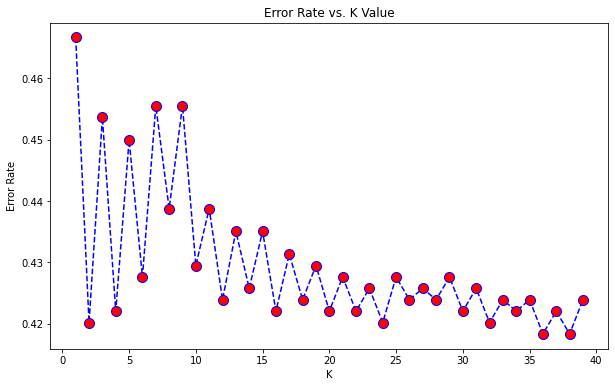

In [18]:
#This is another method used to predict when the dataset performance will be optimal
error_rate = []
for i in range(1,40):
    #this is classifier an object is made
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    # datas set is transfromed and fitted for calculation
    knn.fit(xtrainDataSet.to_numpy(),ytrainDataSet.to_numpy())
    #this is used for prediction
    pred_i = knn.predict(xtestDataSet.to_numpy())
    # predicted data is reshaped
    pred_i=pred_i.reshape(154,1)
    # mean is calculated
    error_rate.append(np.mean(pred_i != ytestDataSet.to_numpy()))
#Plotting of the error rate and Kmean
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#The optimal/best value of K is 31. The graph of the error rate stable after 31.

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.81      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154

Accuracy of KNN classifier on test set: 0.79


<AxesSubplot:>

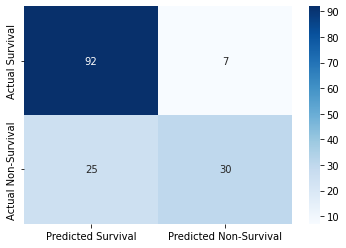

In [19]:
#Use minkowski distance for KNN.(default algorithm)
#Select only 3 attributes for training and testing your model.
#Test it with three different number for neighbors and record the results.
#For all of them print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support).
# Make predictions on validation dataset
#mentioning the k neighbors 

#from the above plot we can determine K values with leaset error rates so we will use these values to make predictions

# K = 31(optimal)

knn = KNeighborsClassifier(n_neighbors=31)
#train the model using training sets-features,labels
knn.fit(xtrainDataSet.to_numpy(), ytrainDataSet.to_numpy()) 
#predict output
predictions = knn.predict(xtestDataSet.to_numpy())
# printing the classification report for knn
print(classification_report(ytestDataSet, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(xtestDataSet.values, ytestDataSet.values)))

#Confusion matrix for KNN
df_cm = pd.DataFrame(
confusion_matrix(ytestDataSet, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

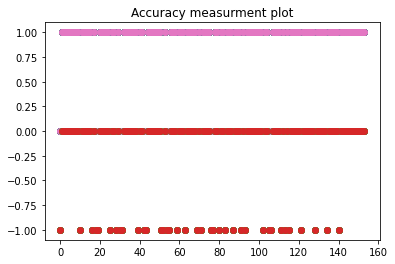

In [20]:
# Plotting the difference between the actual values and predicted values
# Plotting the classifier in a 2D Projection for K=3.
predictions=predictions.reshape(154,1)
plt.plot(ytestDataSet.to_numpy() - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

Accuracy of KNN classifier on test set: 0.77


<AxesSubplot:>

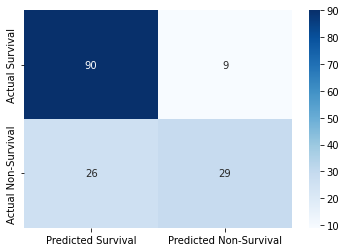

In [21]:
# Second prediction
# K = 6

knn = KNeighborsClassifier(n_neighbors=6)
#train the model using training sets-features,labels
knn.fit(xtrainDataSet.to_numpy(), ytrainDataSet.to_numpy()) 
#predict output
predictions = knn.predict(xtestDataSet.to_numpy())
# printing the classification report for knn
print(classification_report(ytestDataSet, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(xtestDataSet.values, ytestDataSet.values)))

#Confusion matrix for KNN
df_cm = pd.DataFrame(
confusion_matrix(ytestDataSet, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

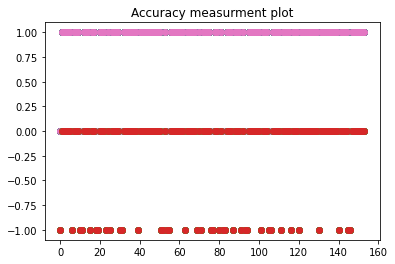

In [22]:
# Plotting the difference between the actual values and predicted values
# Plotting the classifier in a 2D Projection for K=3.
predictions=predictions.reshape(154,1)
plt.plot(ytestDataSet.to_numpy() - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Accuracy of KNN classifier on test set: 0.75


<AxesSubplot:>

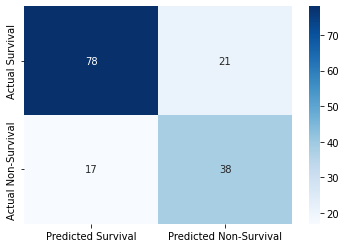

In [23]:
#Third prediction
#from the above plot we can determine K values with leaset error rates so we will use these values to make predictions

# K = 1

knn = KNeighborsClassifier(n_neighbors=1)
#train the model using training sets-features,labels
knn.fit(xtrainDataSet.to_numpy(), ytrainDataSet.to_numpy()) 
#predict output
predictions = knn.predict(xtestDataSet.to_numpy())
# printing the classification report for knn
print(classification_report(ytestDataSet, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(xtestDataSet.values, ytestDataSet.values)))

#Confusion matrix for KNN
df_cm = pd.DataFrame(
confusion_matrix(ytestDataSet, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

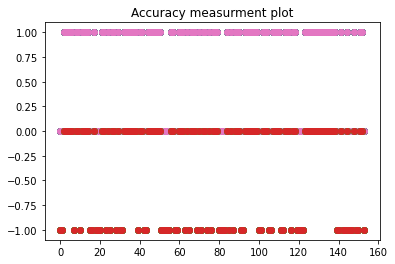

In [24]:
# Plotting the difference between the actual values and predicted values
# Plotting the classifier in a 2D Projection for K=3.
predictions=predictions.reshape(154,1)
plt.plot(ytestDataSet.to_numpy() - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()